Student name: **Siddharth Prince**

Student id: **23052058**

# Task: Deep neural networks

#### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Get the data an manipulate

We're going to use the Fashion MNIST dataset, which we can download from OpenML.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a set of 60,000 samples. Each sample is a 28x28 grayscale image, associated with a label from 10 classes.

Label IDs:
* T-shirt/top - 0
* Trouser - 1
* Pullover - 2
* Dress - 3
* Coat - 4
* Sandal - 5
* Shirt - 6
* Sneaker - 7
* Bag - 8
* Ankle boot - 9

We'll load up the Fashion-MNIST dataset. It will take a few seconds.


In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)

text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

/home/sprince0031/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Let's also visualise a few random samples of this

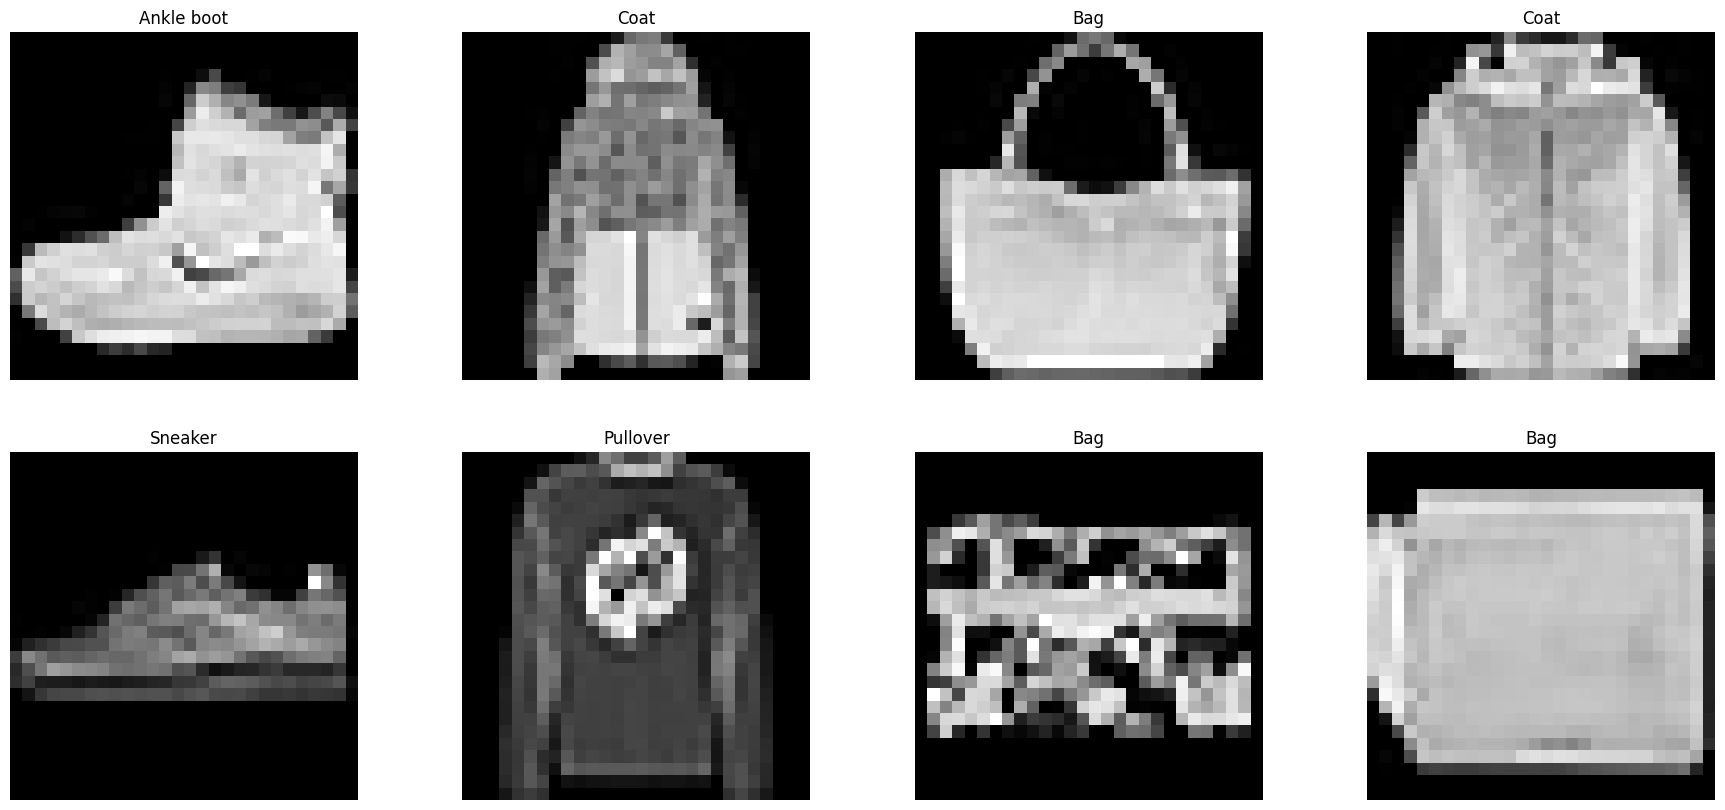

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = (0, 22, 100, 555, 666, 123, 10000, 55005)

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Visualize the image

fig, ax = plt.subplots(2, 4, figsize=(22, 10))
fig.subplots_adjust(wspace=0.3)
ax = ax.flatten()

for i in range(len(index)):
    ax[i].imshow(np.reshape(X[index[i]], (-1, 28)), cmap='gray', vmin=0, vmax=255)
    ax[i].axis('off')  # clear x-axis and y-axis
    ax[i].set_title(text_labels[int(y[index[i]])])

plt.show()

### Data manipulation

Firstly, do a train/test split. Keep 20% of the data for test. Fix the `random_state` so that the test is completely repeatible.

Then use the `StandardScaler` function from `sklearn.preprocessing`, as the multi-layer perceptron can be quite sensitive to data scaling.

<span style="color:red">Insert your code below</span>.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Task 1: Train a Perceptron

1. A single artifical neuron is a Perceptron, so use `sklearn`'s implementation of the Percpetron, and train it.
2. Calculate and print the accuracy
3. Discuss the result, does it seem good or bad?
4. Find an example where the classification is incorrect, and plot it. Discuss (e.g. does it kind of look like the clothing item that was predicted?)
5. Multiclass perceptron? We learned that the Percpetron is a binary classifier. Give a brief description of how multi-class perceptron might work. Of course, use the internet, but give it to me in your own words, and use a diagram as appropriate.

<span style="color:red">Insert your code below</span>.

In [6]:
from sklearn.linear_model import Perceptron as Perceptron 

perceptron = Perceptron()
perceptron.fit(X_train_scaled, y_train)

Perceptron()

In [7]:
from sklearn.metrics import accuracy_score

preds = perceptron.predict(X_test_scaled)
print(f'Accuracy score for the trained perceptron model with testing data: {accuracy_score(y_test, preds) * 100:.2f}%')
trained_preds = perceptron.predict(X_train_scaled)
print(f'Accuracy score for the trained perceptron model with training data: {accuracy_score(y_train, trained_preds) * 100:.2f}%')

Accuracy score for the trained perceptron model with testing data: 81.16%
Accuracy score for the trained perceptron model with training data: 82.57%


<font color='red'>Enter your text here</font>

The accuracy score of 81.16% is okay given that it is a linear classification model. It could probably be improved especially given that object detection models have gotten very good over the past few years. YOLO is a prime example.

Let's look at the first few misclassified item below and analyse it

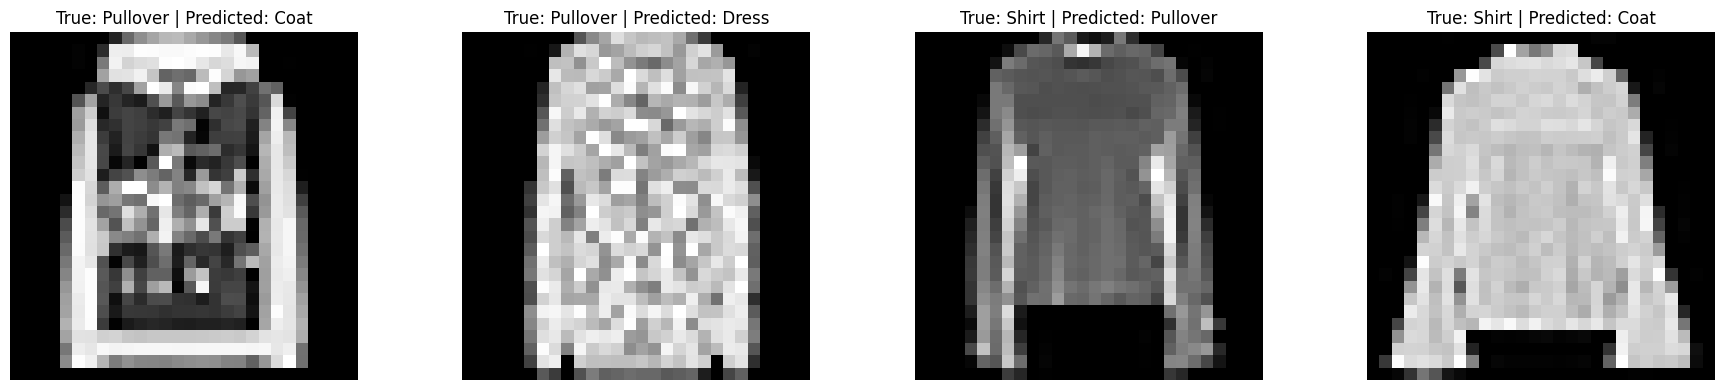

In [11]:
fig, ax = plt.subplots(1, 4, figsize=(22, 10))
fig.subplots_adjust(wspace=0.3)
ax = ax.flatten()
count, indices = 0, []
for i in range(len(preds)):
    if preds[i] != y_test[i]:
        ax[count].imshow(np.reshape(X_test[i], (-1, 28)), cmap='gray', vmin=0, vmax=255)
        ax[count].axis('off')  # clear x-axis and y-axis
        ax[count].set_title(f'True: {text_labels[int(y_test[i])]} | Predicted: {text_labels[int(preds[i])]}')
        indices.append(i)
        count += 1
    if count >= 4:
        break
        
plt.show()

In the above instances of a mis-classifications, we can kind of intuitively guess why it might have happened so. For instance, the thrid image above where the shirt has been classified as a pullover could be a mistake easily made by a human. The nature of the dataset being such that it has low resolution images makes it hard to distinguish between classes that have similar characteristics. Let's look at a side-by-side comparison of the first image with an image of an actual pullover and an actual coat.

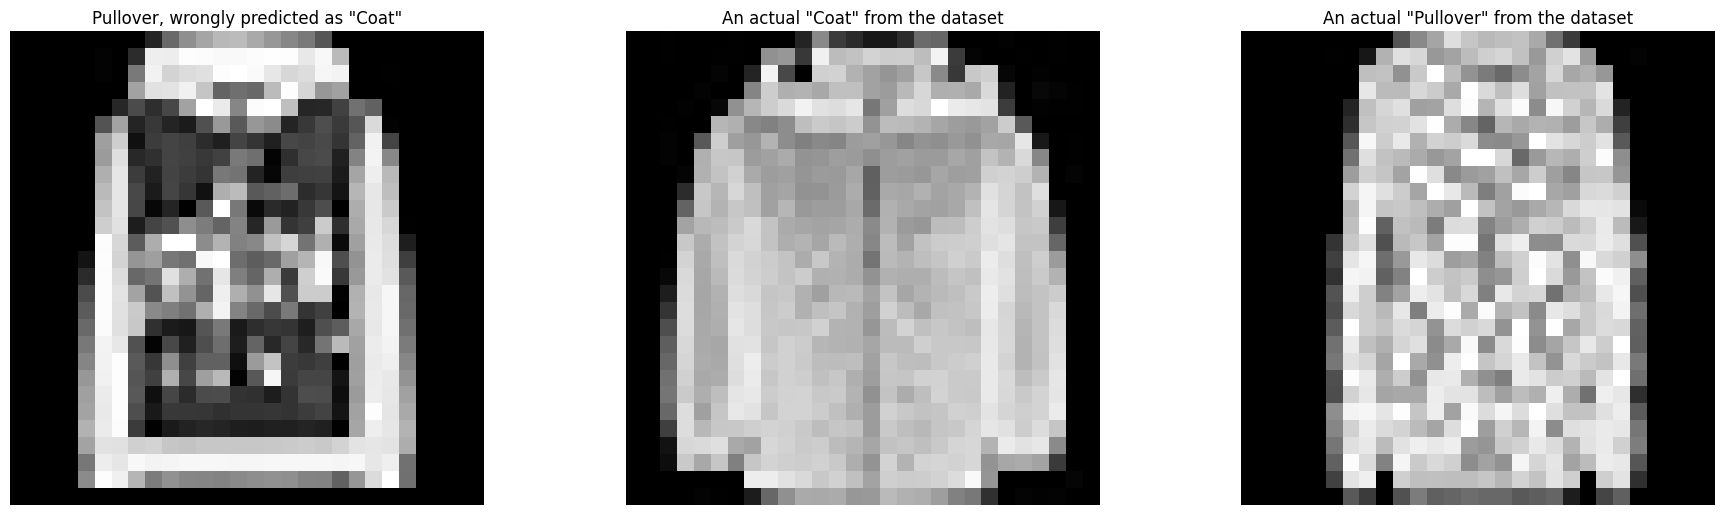

In [16]:
fig, ax1 = plt.subplots(1, 3, figsize=(22, 10))
fig.subplots_adjust(wspace=0.3)
ax1 = ax1.flatten()


ax1[0].imshow(np.reshape(X_test[indices[0]], (-1, 28)), cmap='gray', vmin=0, vmax=255)
ax1[0].axis('off')  # clear x-axis and y-axis
ax1[0].set_title(f'{text_labels[int(y_test[indices[0]])]}, wrongly predicted as "{text_labels[int(preds[indices[0]])]}"')
ax1[1].imshow(np.reshape(X[555], (-1, 28)), cmap='gray', vmin=0, vmax=255)
ax1[1].axis('off')  # clear x-axis and y-axis
ax1[1].set_title(f'An actual "{text_labels[int(y[555])]}" from the dataset')
ax1[2].imshow(np.reshape(X_test[indices[1]], (-1, 28)), cmap='gray', vmin=0, vmax=255)
ax1[2].axis('off')  # clear x-axis and y-axis
ax1[2].set_title(f'An actual "{text_labels[int(y_test[indices[1]])]}" from the dataset')

plt.show()

#### Observations:
- We can see that the first image has a raised portion where the collar usually is. This is either a collar or part of a hoodie. Coats usually have a raised (not sure if this is the correct "fashion terminology". Fashion Soc people might call it heresy :P) or prominent collar area or a hoodie. This is visible in the second image above where there is a visual difference in this area of the clothing in an actual coat when compared to an actual pullover in the third image.
- Also, in coats there are zippers or some partition in the middle. The mis-classified image above has a set of pixels vertically arranged in the middle that might indicate to the model that this is a similar feature.  
  
So, in general, we can intuitively see why they would look similar enough especially at these lower resolutions to the model.

### Multiclass perceptron:
From my searching around, the Perceptron model from ScikitLearn uses the **One-vs-All (OvA)** technique to perform multi-class classification. What this means is that the Perceptron class trains separate binary perceptron classifiers for each class in the dataset. Each one is trained in such a way that the positive examples are instances of that class and all other data points that classify to different classes are considered negative example.

The accuracy is not too bad for a simple linear classifier. However, as with all of these types of problems, most of the effort will go into gaining small, but important imporvements. Let's see if we can make it better.

## Task 2: Train a multi-layer Perceptron with one hidden layer (of width 20)

Let's try going wide first

* Set the regularizing parameter to 0.1 (alpha = 0.1). We have looked at regularisation before in the context of machine learning algorithms. It is important, but we won't investigate it further here. We'll leave this fixed.
* Set verbose = 1, so we can look at what is happenign on each epoch (iteration)
* Set random_state=1 (or some constant), so the test is repeatible
* For the moment, set hidden_layer_sizes to (20,). 

This tuple then sets the number of hidden layers. The number of values in the tuple is the number of layers, and the number of each value is the number of nodes in that layer. So a tuple of (50,30,10) would be one layer with 50 nodes, connect to a second hidden layer with 30 nodes and a final hidden layer with 10 nodes). But for the moment, just go for one hidden layer with 20 nodes.

Also print the __training and accuracy score__ of our current network (remember the `accuracy_score` function from `sklearn.metrics`?). The score on the test dataset should not be too bad at this point. That's quite impressive for a first stab at a neural network. Let's see if we can do better, though!

<span style="color:red">Insert your code below</span>.

In [17]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=0.1, verbose=1, random_state=42, hidden_layer_sizes=(20,))
mlp.fit(X_train_scaled, y_train)

Iteration 1, loss = 0.65226459
Iteration 2, loss = 0.43831608
Iteration 3, loss = 0.40226257
Iteration 4, loss = 0.38179829
Iteration 5, loss = 0.36728105
Iteration 6, loss = 0.35776215
Iteration 7, loss = 0.34954336
Iteration 8, loss = 0.34104124
Iteration 9, loss = 0.33694452
Iteration 10, loss = 0.33222178
Iteration 11, loss = 0.32780911
Iteration 12, loss = 0.32387997
Iteration 13, loss = 0.31965706
Iteration 14, loss = 0.31811203
Iteration 15, loss = 0.31457335
Iteration 16, loss = 0.31268883
Iteration 17, loss = 0.31055972
Iteration 18, loss = 0.30676419
Iteration 19, loss = 0.30477562
Iteration 20, loss = 0.30436365
Iteration 21, loss = 0.30079397
Iteration 22, loss = 0.29982949
Iteration 23, loss = 0.29793866
Iteration 24, loss = 0.29666269
Iteration 25, loss = 0.29636652
Iteration 26, loss = 0.29343013
Iteration 27, loss = 0.29297305
Iteration 28, loss = 0.29330393
Iteration 29, loss = 0.29037594
Iteration 30, loss = 0.28942154
Iteration 31, loss = 0.28910554
Iteration 32, los

MLPClassifier(alpha=0.1, hidden_layer_sizes=(20,), random_state=42, verbose=1)

In [18]:
from sklearn.metrics import accuracy_score

mlp_preds = mlp.predict(X_test_scaled)
mlp_trained_preds = mlp.predict(X_train_scaled)
print(f'Accuracy score for multi-layer perceptron classifier with test data: {accuracy_score(y_test, mlp_preds) * 100:.2f}%')
print(f'Accuracy score for multi-layer perceptron classifier with train data: {accuracy_score(y_train, mlp_trained_preds) * 100:.2f}%')

Accuracy score for multi-layer perceptron classifier with test data: 86.85%
Accuracy score for multi-layer perceptron classifier with train data: 93.16%


#### Questions: (answer here)

1. What is the size of the input layer here? Explain
2. What is the size of the output layer here? Explain
3. How many weights in total does the algorithm learn?
4. What does it mean that the training accuracy and the test accuracy are different?

<font color='red'>Enter your text here</font>

In [19]:
mlp.n_features_in_

784

In [20]:
mlp.n_outputs_

10

In [21]:
mlp.intercepts_

[array([ 0.54558791, -0.54647286,  0.7562678 , -0.05268325,  1.03299706, -0.28445144,  0.5943144 ,  0.04782177, -0.11158738, -0.24628674, -0.115924  , -0.27218894, -0.34311121, -0.44541853,  0.04747189, -0.18250935,  0.33183437, -0.95812612,  0.24417222, -0.10479691]),
 array([ 0.10821639, -0.60457504,  0.12638246,  0.50892657, -0.07044261, -2.09085732,  0.30770529, -1.11660267,  0.07395595, -0.22170666])]

In [45]:
sum(mlp.intercepts_[0])
len(mlp.intercepts_[0])
len(mlp.intercepts_[1])
sum(mlp.intercepts_[1])

-2.9789976286306334

#### Wider, wider, wider

Let's go wider. We have quite a lot of input features, and somehow it might seem that if we immediately connect this to a layer with only 20 neurons that something might be lost?

Let's see if more features help!

Iterate over a wider number of neurons, and plot the train accuracy and test accuracy as a graph. For example, iterate over a set of widths of `(20, 50, 100, 200)`, or something similar.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

<font color='red'>Enter your code here</font>

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import time

########################
# Your classifier training code here

a_test = []
a_train = []

widths = (20, 50, 75, 100, 200)

for width in widths:
    now = time.time()
    mlp_classifier = MLPClassifier(alpha=0.001, verbose=0, random_state=42, hidden_layer_sizes=(width,))
    mlp_classifier.fit(X_train_scaled, y_train)

    mlp_test_preds = mlp_classifier.predict(X_test_scaled)
    mlp_train_preds = mlp_classifier.predict(X_train_scaled)

    a_test.append(accuracy_score(y_test, mlp_test_preds))
    a_train.append(accuracy_score(y_train, mlp_train_preds))

    print(f'Time taken for iteration with {width} neurons in the hidden layer: {time.time() - now} seconds\n')
    print(f'Test accuracy for MLP classifier with a width of {width}: {a_test[len(a_test) - 1]}')
    print(f'Train accuracy for MLP classifier with a width of {width}: {a_train[len(a_train) - 1]}')
    print('-----------------------------------------------------------------------------------------')

/home/sprince0031/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Time taken for iteration with 20 neurons in the hidden layer: 102.9824755191803

Test accuracy for MLP classifier with a width of 20: 0.8559285714285715
Train accuracy for MLP classifier with a width of 20: 0.9553035714285715
-----------------------------------------------------------------------------------------
Time taken for iteration with 50 neurons in the hidden layer: 131.33662390708923

Test accuracy for MLP classifier with a width of 50: 0.8706428571428572
Train accuracy for MLP classifier with a width of 50: 0.9959821428571428
-----------------------------------------------------------------------------------------
Time taken for iteration with 75 neurons in the hidden layer: 99.96096849441528

Test accuracy for MLP classifier with a width of 75: 0.8830714285714286
Train accuracy for MLP classifier with a width of 75: 0.9966964285714286
-----------------------------------------------------------------------------------------
Time taken for iteration with 100 neurons in the hi

ValueError: x and y must have same first dimension, but have shapes (6,) and (5,)

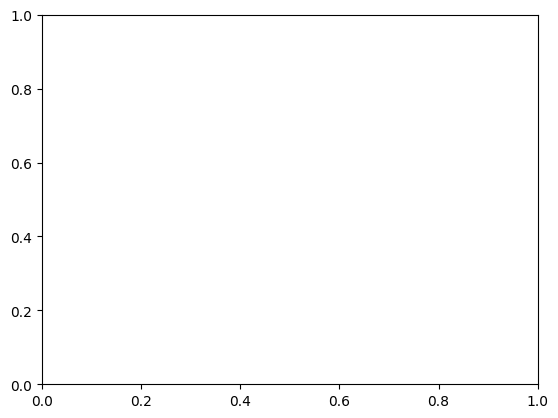

In [29]:
import matplotlib.pyplot as plt

plt.plot(a_test, widths)
plt.plot(a_train, widths)
plt.xlabel('Hidden layer widths')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy Scores')
plt.show()

In [30]:
print(a_test)

[0.8651428571428571, 0.8625714285714285, 0.8596428571428572, 0.858, 0.8711428571428571, 0.8927142857142857]


Questions:

1. When you trained for all the different widths, did you notice anything about how long each training took? Discuss this.

2. What can you infer from the graph?

For the second question, think about the following:
* For the number of neurons you have tested, what is the best? (Highest performance -vs- lowest number of neurons)
* How many weights are learned by the algorithm for our optimal solution?
* Is there any evidence of overfitting occuring? Discuss this. What could we do to reduce this, if it is evident? (No need to implement anything to address tyhe overfitting, just comment)
(Hint: a large divergence between training accuracy and testing accuracy can indicate over-fitting).

<font color='red'>Enter your text here</font>

## Task 3: The deeper the better!

Previously, we only had a single hidden layer, and we went as wide as a couple of hundred neurons. That is a lot of neurons and a lot of computation. Can we do better with fewer neurons by going deeper and using more layers? Now we're going to start playing with different configurations.

Rerun the above loop, but let's use a set of deeper networks. These are going to be simply designed. I suggest to use something like:
`layers = ((20,20),(20,20,20),(50,20),(100,100,50))`

Plot the train and test accuracy as a graph.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

**Note**: you might be feeling at this point that picking the neural network architecture is kind of random. At the moment, it is, to be honest. How many neurons per layer should I use? How many layers? And then I have to pick the training parameters on top of this?? These are all called hyperparameters of the network, and there is a lot of skill to develop to develop to be able to design networks efficiently and pick the right training parameters.

<font color='red'>Enter your code here</font>

In [28]:
layers = ((20,20),(20,20,20),(50,20),(100,100,50))

a_deeper_test = []
a_deeper_train = []

for layer in layers:
    now = time.time()
    mlp_deeper_classifier = MLPClassifier(alpha=0.001, verbose=0, random_state=42, hidden_layer_sizes=layer)
    mlp_deeper_classifier.fit(X_train_scaled, y_train)

    mlp_deeper_test_preds = mlp_deeper_classifier.predict(X_test_scaled)
    mlp_deeper_train_preds = mlp_deeper_classifier.predict(X_train_scaled)

    a_test.append(accuracy_score(y_test, mlp_deeper_test_preds))
    a_train.append(accuracy_score(y_train, mlp_deeper_train_preds))

    print(f'Time taken for iteration with a network structure of {layer}: {time.time() - now} seconds\n')
    print(f'Test accuracy for MLP classifier a network structure of {layer}: {a_test[len(a_test) - 1]}')
    print(f'Train accuracy for MLP classifier a network structure of {layer}: {a_train[len(a_train) - 1]}')
    print('-----------------------------------------------------------------------------------------')


/home/sprince0031/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Time taken for iteration with a network structure of (20, 20): 463.22104716300964 seconds

Test accuracy for MLP classifier a network structure of (20, 20): 0.8596428571428572
Train accuracy for MLP classifier a network structure of (20, 20): 0.96175
-----------------------------------------------------------------------------------------


/home/sprince0031/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Time taken for iteration with a network structure of (20, 20, 20): 549.6618485450745 seconds

Test accuracy for MLP classifier a network structure of (20, 20, 20): 0.858
Train accuracy for MLP classifier a network structure of (20, 20, 20): 0.9593928571428572
-----------------------------------------------------------------------------------------
Time taken for iteration with a network structure of (50, 20): 345.45467472076416 seconds

Test accuracy for MLP classifier a network structure of (50, 20): 0.8711428571428571
Train accuracy for MLP classifier a network structure of (50, 20): 0.9863035714285714
-----------------------------------------------------------------------------------------
Time taken for iteration with a network structure of (100, 100, 50): 687.5851299762726 seconds

Test accuracy for MLP classifier a network structure of (100, 100, 50): 0.8927142857142857
Train accuracy for MLP classifier a network structure of (100, 100, 50): 0.9930357142857142
-------------------

In [13]:
import matplotlib.pyplot as plt

########################
# Your visualisation code here


#### Questions

What can you infer from the graph? (answer in the text box here).

Think about the following:
* Do I have a deeper network that has fewer neurons but is doing better than my very wide network?
* How many weights did I need to train?

<font color='red'>Enter your text here</font>

## Task 4: Confusion matrix

A [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) is a powerful way to visualise errors in your trained network. Plot a confusion matrix for your best model above (of course, plot using the test data).

Describe what you see in the confusion matrix.

<font color='red'>Enter your code here</font>

In [14]:
########################
# Your code here


<font color='red'>Enter your text here</font>